**B-Spline Signal Processing: Part 1 - Theory**

1. The goal of this paper is to develop a theory of constructing an image function that best represents the discrete data of a digital image. For sake of simplicity, let us consider grey-scale images. In this case, an image function maps every point in the $xy$ plane to the image intensity at that point. In mathematical terms, an image function $g$ maps $\mathbb{R}^2$ to $\mathbb{R}$.

2. Before considering the problem of constructing an image function, let us consider the simpler problem of representing a one-dimensional discrete time/space signal with a continuous function. Suppose a discrete signal takes values $y_1, \ldots, y_n$ at points $x_1, \ldots, x_n$. Then we must find a function $f$ that takes values $y_1, \ldots, y_n$ at points $x_1, \ldots, x_n$ but can take arbitrary values at other points. Clearly, there are an infinitely many functions that satisfy this property. Which one of them should we choose?

3. Normally, we choose smooth functions. The word 'smooth' means what it means in plain English. The one which does not fluctuate wildly and whose plot has no corners. In mathematical terms, 'smooth' means that the function is continuous and it has continuous derivatives up a certain order $n$. That is, not only is the function $f$ continous but so are its first $n$ derivatives $f^\prime, f^{\prime\prime}, \ldots, f^{(n)}$. To understand the need for the derivatives to be continuous, let us consider a function which is not smooth. When we plot the function $y = |x|$ in an interval $[-1, 1]$ we notice that it is certainly continous. For, we can draw it from one end to the other without lifting the pencil. However, it has a sharp corner at the origin. The corner is characterized by the discontinuity of the derivative of the function at the origin. The derivative is $-1$ for all $x < 0$ and is $1$ for all $x > 0$. The derivative does not exist at $x = 0$. On the other hand, the function $y = x^2$ is a smooth function. It is continuous and also has a continuous derivative $y^\prime = 2x$.

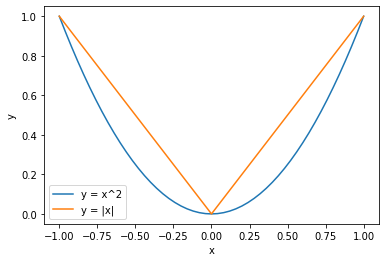

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 51)
plt.plot(x, x*x, label = 'y = x^2')
plt.plot(x, abs(x), label = 'y = |x|')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

4. Yet, there are a large number of smooth functions that can take values $y_1, \ldots, y_n$ at $x_1, \ldots, x_n$. Once again, we demonstrate this fact with an example. The code snippet below show how we can fit polynomials of degrees $3, 5$ and $7$ to the points marked as red dots. We notice that higher order polynomials fit the function better but they also oscillate more than the function we are trying to approximate. This is where splines come into the picture.

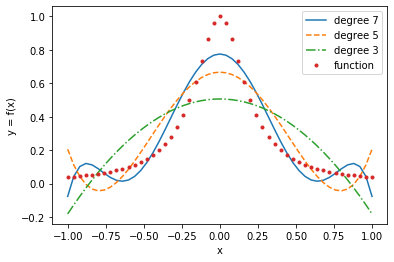

In [2]:
def f(x):
    return 1/(1 + 25*pow(x, 2))

x = np.linspace(-1, 1, 101)
p3 = np.poly1d(np.polyfit(x, f(x), 3))
p5 = np.poly1d(np.polyfit(x, f(x), 5))
p7 = np.poly1d(np.polyfit(x, f(x), 7))

xp = np.linspace(-1, 1, 51)
plt.plot(xp, p7(xp), '-', label = 'degree 7') 
plt.plot(xp, p5(xp), '--', label = 'degree 5')
plt.plot(xp, p3(xp), '-.', label = 'degree 3')
plt.plot(xp, f(xp), '.', label = 'function')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()

5. The word spline means a long, thin, flexible strip of wood or a metal. It was used in the pre-computer days to draw smooth curves passing through fixed points. The points were marked with heavy nails and the spline was made to go around each on of them. It described a smooth curve that passed through all points. The Romanian-American mathematician I. J. Schoenberg used this idea to generate smooth functions passing through given points and decided to call them spline functions. We will continue the same example and show the results of spline interpolation. We observe that the spline represent the functions much better than the polynomials. Now that we have seen how splines are useful, we will describe them mathematically.

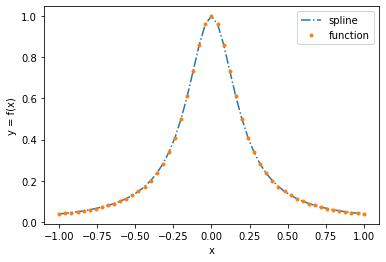

In [3]:
from scipy import interpolate
tck = interpolate.splrep(x, f(x))
y_sp = interpolate.splev(xp, tck)
plt.plot(xp, y_sp, '-.', label = 'spline')
plt.plot(xp, f(xp), '.', label = 'function')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()

6. The 'coefficients' of the spline are of the same order of magnitude as the data they are fitting. We confirm this by looking at the summary of the numbers in each component of the tuple 'tck'.

In [ ]:
from scipy.stats import describe
describe(tck[0])
describe(tck[1])

7. A mathematical description of splines requires a little background in functional analysis. Functional analysis is analogous to linear algebra. Functions play the same role in functional analysis that vectors play in linear algebra. We will, therefore, introduce this topic by drawing an analogy with linear algebra. A vector in a plane needs to components to describe it completely. We conventionally call them the $x$ and the $y$ components. Likewise, a vector in three dimensions needs three components, called the $x, y$ and $z$ components. In general, a vector $v$ in $n$ dimensions needs $n$ components, usually denoted by $v_1, \ldots, v_n$. We always consider vectors with a finite number of dimensions in linear algebra, although that number can be arbitrarily large. The restriction that there are only a finite dimensions implies that all the sums involved in operations on vectors are also finite and therefore they are always defined. The difference between vectors in linear algebra and functions in functional analysis is that the latters are infinite-dimensional objects. But before we get to infinite-dimensional spaces, let us review a few ideas from the more familiar territory of linear algebra.

8. Consider a vector $v =(-1, 4) \in \mathbb{R}^2$. We can write it as
$$
v = -1\begin{pmatrix}1 \\ 0\end{pmatrix} + 4\begin{pmatrix}0 \\ 1\end{pmatrix}.
$$
In fact, any vector $u = (\alpha, \beta)$ can be written as
$$
v = -1\begin{pmatrix}1 \\ 0\end{pmatrix} + 4\begin{pmatrix}0 \\ 1\end{pmatrix}.
$$
We call the vectors $e_1 = (1, 0)^T$ and $e_2 = (0, 1)^T$ as the basis vectors. Any vector in $\mathbb{R}^2$ can be written as a linear combination of $e_1$ and $e_2$. $\mathbb{R}^2$ is a two dimensional vector space because there are two members in its basis. Likewise, it is easy to confirm that the vectors $e_1 = (1, 0, 0)^T,
e_2 = (0, 1, 0)^T$ and $e_3 = (0, 0, 1)^T$ are a basis of the three dimensional vector space $\mathbb{R}^3$. We can extend this idea to an $n$-dimensional vector space.

9. Consider the $n$-dimensional vector space $\mathbb{R}^n$ and let $v_1 = (\alpha_1, \ldots, \alpha_n)^T$ and $v_2 = (\beta_1, \ldots, \beta_n)^T$ be two vectors in it. Then the inner product of $v_1$ and $v_2$ is defined as
$$(v_1, v_2) = \alpha_1\beta_1 + \cdots + \alpha_n\beta_n.$$ In three dimensions the inner product is the 'dot product'. The following properties of the inner product are evident from its definition.

    9.1. $(v_1, v_2) = (v_2, v_1)$. The order of vectors does not matter in an inner product.

    9.2. $(\alpha v_1, v_2) = \alpha(v_1, v_2)$ for any scalar $\alpha \in \mathbb{R}$.

    9.3. $(v, v) \ge 0$ for all vectors $v$.

10. Sometimes, it is convenient to consider vectors whose components are complex numbers. When this is case, the inner product is defined as $$(v_1, v_2) = \alpha_1\bar{\beta}_1 + \cdots \alpha_n\bar{\beta}_n,$$ where the bar over a scalar denotes its complex conjugate. The three properties mentioned in the previous point are modified to:

    10.1. $(v_1, v_2) = \overline{(v_2, v_1)}$. The order of vectors *does* matter in an inner product.

    10.2. $(\alpha v_1, v_2) = \alpha(v_1, v_2)$ for any scalar $\alpha \in \mathbb{C}$. However $(v_1, \alpha v_2) = \bar{\alpha}(v_1, v_2)$.

    10.3. $(v, v) \ge 0$ for all vectors $v$.
    
11. The inner product $(v, v)$ is also called the norm of a vector, denoted by $||v||$. A vector space in which a norm is defined is called a *normed vector space*.

12. A Hilbert space is a *normed vector space* which is also a *complete metric space*. We defined a normed vector space in the previous point. We will now turn our attention to metric spaces and completeness. The word metric is related to measurement. In the context of metric spaces, it is related to distance. A metric tells how to compute distance between two elements of a set. If the set were a plane then one way to measure distance between points $(x_1, y_1)$ and $(x_2, y_2)$ is the usual euclidean formula $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$. There is no one right way to measure distance between elements. An alternative to the euclidean formula is $|x_1 - x_2| + |y_1 - y_2|$. Whatever be the formula, a metric must have the following properties:

    12.1. Distances are always non-negative.
    
    12.2. Distance between points $x$ and $y$ must be the same as that between $y$ and $x$.
    
    12.3. Distance between points $x$ and $z$ is no smaller than the sum of distance between $x$ and $y$ and between $y$ and $z$.
    
13. Let us express the properties mentioned in the previous point in mathematical terms. If $X$ is a set then a metric is a mapping $d: X \times X \mapsto [0, \infty)$. The mapping $d$ takes two points $x$ and $y$ to give the distance $d(x, y)$ between them. A set $X$ and a mapping $X \times X \mapsto [0, \infty)$ is a metric space if

    13.1 $d(x, y) \ge 0$, for all $x, y \in X$;
    
    13.2 $d(x, y) = d(y, x)$ for all $x, y \in X$;
    
    13.3 $d(x, z) \le d(x, y) + d(y, z)$ for all $x, y, z \in X$.
    Points 13.1 to 13.3 are just the mathematical representation of the points 12.1 to 12.3.

14. The idea of 'completeness' is a little subtle. It is related to convergence of sequences of elements of a set. A sequence of elements $\{x_1, x_2, \ldots\}$ is said to converge to an element $l$ if for any $\epsilon > 0$, we can find a number $N$ such $d(l, x_n) < \epsilon$ for all $n \ge N$. This means that for any $\epsilon$, howsoever small, an infinitely many points of the sequence lie within a distance $\epsilon$ of $l$. The point $l$ is called a limit point. A set is complete if it contains all its limit points.

15. We now have all the concepts to understand what a Hilbert space is. It is a vector space with a norm and which is also a complete metric space. A simple example of a Hilbert space is given in section II(A) of the paper. Let us understand why it is a Hilbert space. Consider the set of all sequences $\{a_k\}$ (the paper uses the notation $a(k)$) which are square summable. Square summable means that the $$\sum_{k = 1}^\infty |a_k|^2$$ exists. We will first show that it is a vector space. The proof is not difficult but it uses a property we will only mention.

16. To prove that $l_2$ is a vector space we must first show that if $\{a_k\}$ and $\{b_k\}$ are members of $l_2$ then so is $\{a_k + b_k\}$. This will be true if $$\sum_{k \ge 1} |a_k + b_k|^2$$ converges. Now, 
$$
\sum_{k \ge 1} |a_k + b_k|^2 = \sum_{k \ge 1} |a_k^2 + b_k^2 + 2a_kb_k| \le \sum_{k \ge 1}\left(|a_k|^2 + |b_k|^2 + 2|a_kb_k|\right)
$$
We will now use the *Cauchy-Schwarz property* 
$$
\sum_{k \ge 1} |a_kb_k|^2 \le \sum_{k \ge 1}|a_k|^2\sum_{k \ge 1}|b_k|^2
$$ 
to conclude that $\sum_{k \ge 1}|a_kb_k|$ also converges. As every term on the right hand side of the equation before the previous one converges so does the left hand side.

17. The norm in $l_2$ is that is given by equation (2.1) of the paper.

18. It takes a bit of mathematical analysis to show completeness. One easy to understand proof is available on [StackExchange](https://math.stackexchange.com/questions/1259364/show-that-l2-is-a-hilbert-space).

19. The z-transform of a signal $x[n]$ is defined as $$X(z) = \sum_{n=-\infty}^\infty x[n]z^{-n}.$$ It exists at all points in the complex plane where the sum is absolutely convergent. That is, all points $z$ for which the sum $$\sum_{n=-\infty}^\infty \large|x[n]z^{-n}\large|$$ exists. The region of the complex plane where $X(z)$ exists is called the *region of convergence (ROC)*. 

20. The convolution of signals $x[n]$ and $y[n]$ is defined as $$(x \ast y)[n] = \sum_{m = -\infty}^\infty x[m]y[n-m].$$ An important property of z-transforms is that the if $u[n] = (x \ast y)[n]$ then $U(z) = X(z)Y(z)$. That is, a z-transform of a convolution of two signals is the product of their z-transforms. We can unravel a convolution to get the original signal by using the relation $X(z) = U(z)/Y(z)$ at any point in the complex plane where $Y(z) \ne 0$.

21. The adjoint of a signal is defined as $x^\ast[n] = \overline{x[-n]}$. This is analogous to the definition of the hermitian adjoint of a matrix. It is just the complex conjugate of the transpose. *Note that we use a different notation for the adjoint from what is used in the paper.*

22. We will now consider the $z$-transform of the adjoint of a signal $x[n]$. It is $$
X^\ast(z) = \sum_{n=-\infty}^\infty x^\ast[n]z^{-n} = \sum_{n=-\infty}^\infty \overline{x[-n]}z^{-n} =
\sum_{n=\infty}^{-\infty} \overline{x[n]}z^n,$$ where in the last expression we have used the transformation $n \mapsto -n$. We will now transform the last expression in a form that is matches the definition of the z-transform. $$X^\ast(z) = \sum_{n=-\infty}^\infty \overline{x[n]}\left(\frac{1}{z}\right)^{-n} = \overline{X\left(\frac{1}{z}\right)}.$$
If $x[n]$ is a real-valued signal then $x^\ast[n] = x[-n]$ and $$X^\ast(z) = X\left(\frac{1}{z}\right).$$

23. We can 'up-sample' a signal by a factor of $m$ (a positive integer) by inserting $m - 1$ zeros between successive values of the signal. Mathematically, an up-sampled signal is defined as $$x_{\uparrow m}[n] = \begin{cases} x[l] & \text{ if } n = ml \\ 0 & \text{ otherwise}\end{cases}.$$ We can easily get an expression for the $z$-transform of the up-sampled signal.
$$X_{\uparrow m}(z) = \sum_{n=-\infty}^\infty x_{\uparrow m}[n] z^{-n} = \sum_{n=-\infty}^\infty x[n] z^{-mn} = X(z^m).$$

24. We 'down-sample' a signal by a factor of $m$ (a positive integer) by selecting every $m$-th of its values. Mathematically, a down-sampled signal is defined as $$x_{\downarrow m}[n] = x[mn].$$ Getting an expression for the $z$-transform of a down-sampled signal involves a little more work. This is because,
$$X_{\downarrow m}(z) = \sum_{n=-\infty}^\infty x_{\downarrow m}[n] z^{-n} = \sum_{n=-\infty}^\infty x[mn] z^{-n} = X(z^m).$$ The last summation is over the number $\ldots, -3m, -2m, -m, 0, m, 2m, 3m, ...$ and not over all integers. Therefore we cannot intepret the last expression as a $z$-transform. We need a trick to make the sum run over all integers. To use it we use the fact 
$$
\sum_{j=0}^{m-1}\exp\left(\frac{2\pi ijn}{m}\right) = \begin{cases}
m & \text{ for } n = \{\ldots, -2n, -n, 0, n, 2n, \ldots\} \\
0 & \text{ otherwise}
\end{cases}
$$
to define the pulse sequence
$$
p_m[n] = \frac{1}{m}\sum_{j=0}^{m-1}\exp\left(\frac{2\pi ijn}{m}\right) = \begin{cases}
1 & \text{ if } 
n = \{\ldots, -2n, -n, 0, n, 2n, \ldots\} \\
0 & \text{ otherwise.}
\end{cases}
$$
We can then write
$$
X_{\downarrow m}(z) = \sum_{n=-\infty}^\infty p_m[n]x[n]z^{-n/m},
$$ 
where the summation runs over all integers. After substituting the expression for $p_m[n]$ we readily get
$$
X_{\downarrow m}(z) = \frac{1}{m}\sum_{j=0}^{m-1}X\left(e^{-2\pi ik/m}z^{1/m}\right).
$$

25. We introduced the idea of splines informally in point 5. We will now give a rigorous mathematical definition. Recall that a spline was a flexible strip that went around a sequence of heavy nails. Mathematically, this means that spline is a function $S:[a, b] \mapsto \mathbb{R}$ where the interval $[a, b]$ is punctuated by points $t_1, t_2, \ldots, t_{n-1}$. The points $t_1, t_2, \ldots, t_{n-1}$ are called *knots* and they correspond to the *nails* in the informal description of the spline. Let us, for convenience, define $t_0 = a$ and $t_n = b$. In each interval $[t_i, t_{i+1}]$, $i = 0, \ldots, n-1$, the function $S$ is a polynomial $P_i$. These $n$ polynomials are not unrelated. They take identical values with the succeeding polyomials at the knot points. Not only that, their derivatives match at the knot points.

26. The set of all splines where the degree of the polynomials is $n$ is denoted by $S_1^n$. The subscript $1$ indicates that the knots are a distance $1$ apart. $S_1^n$ is an infinite dimensional Hilbert space. Elements of $S_1^n$ are called splines and its basis elements are called B-splines. Since an element of $S_1^n$ is a polynomial of degree $n$ between any two consective knots, the element is $n$ times differentiable and therefore it also belongs to the class $C^{n-1}$.

27. The basis functions of $S_1^n$ are defined as
$$
\beta^n(x) := \sum_{j=0}^n\frac{(-1)^j}{n!}\binom{n+1}{j}\left(x + \frac{n+1}{2} - j\right)^n\mu\left(x + \frac{n+1}{2} - j\right),
$$ where $\mu$ is the step function. If $n = 3$, the basis functions are
$$
\beta^3(x) = -\frac{2}{3}(x+1)^3\mu(x+1) + x^3\mu(x) - \frac{2}{3}(x-1)^3\mu(x-1) + \frac{1}{6}(x-2)^3\mu(x-2).
$$
Any element of $S_1^n$ can be expressed as a linear combination of its basis. If $g^n(x) \in S_1^n$ then
$$
g_n(x) = \sum_{k=-\infty}^\infty y_k\beta^n(x-k).
$$
The numbers $y_k$ form a sequence of numbers. Note that the set $\mathcal{B} = \{\beta^n(x-k): n \in \mathbb{Z}\}$ forms the basis of $S_1^n$. The set $\mathcal{B}$ is countably infinite. As a result, $S_1^n$ is infinite dimensional. We can study the properties of $S_1^n$ through a study of the basis functions.

28. Let us consider the plots of first two B-splines.

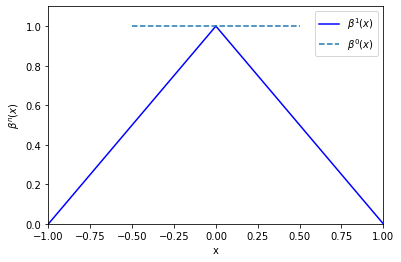

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-1/2, 1/2, 11)
y1 = np.ones(11)
x2a = np.linspace(-1, 0, 10)
y2a = x2a + 1
x2b = np.linspace(0, 1, 10)
y2b = 1 - x2b
plt.xlim(-1, 1)
plt.ylim(0, 1.1)
plt.plot(x2a, y2a, '-', color = 'blue', label = r'$\beta^1(x)$')
plt.plot(x2b, y2b, '-', color = 'blue')
plt.plot(x1, y1, '--', label = r'$\beta^0(x)$')
plt.xlabel('x')
plt.ylabel(r'$\beta^n(x)$')
plt.legend()
plt.show()

29. B-splines satisfy the following recurrence relation
$$
n\beta^n(x) = \left(\frac{n+1}{2}+x\right)\beta^{n-1}\left(x+\frac{1}{2}\right) + \left(\frac{n+1}{2}-x\right)\beta^{n-1}\left(x-\frac{1}{2}\right).
$$
I could not find an easy proof of this relation. Likewise, it is quite tedious to prove the convolution property of equation (2.9) except for the simplest case $n=1$. Before we get to the details, we note that $\beta^0(x) = \mu(x - 1/2) + \mu(x + 1/2)$ and $\beta^1(x) = (x+1)\mu(x+1) - 2x\mu(x) + (x-1)\mu(x-1)$. The shapes of $\beta^0$ and $\beta^1$ are shown in the plot above. The function $\beta^0$ is zero except when $x \in [-1/2, 1/2]$, where it is $1$. The function $\beta^1$ is equal to $1 + x$ when $x \in [-1, 0]$ and it is $1 - x$ when $x \in [0, 1]$.
We now consider the convolution $$I(x) = \int_{-\infty}^\infty\beta^0(y)\beta^0(x - y)dy.$$ From the properties of $\beta^0$ it is clear that the integrand vanishes outside of $[-1, 1]$. The B-spline $\beta^1$ too has the same behaviour, which suggests that we are on the right track. Therefore, $$I(x) = \int_{-1}^1 \beta^0(y)\beta^0(x-y)dy.$$ From the properties of $\beta^0$, we know that the integrand of $I(x)$ vanishes unless $-1/2 \le y \le 1/2$ and $-1/2 \le x - y \le 1/2$. The second of these inequalities can be written as $x-1/2 \le y \le x+1/2$. We must evaluate the integral $I(x)$ subject to these two inequalities. When $x \in [-1, 0]$ the integrand is non-zero only when $y \in [-1/2, x + 1/2]$. When $x \in [0, 1]$ the integrand is non-zero only when $y \in [x - 1/2, 1/2]$. Therefore,
$$ I(x) = \begin{cases}
x + 1 & { \text{if} } x \in [-1, 0] \\
1 - x & { \text{if} } x \in [0, 1] \\
0 & { \text{otherwise}.}
\end{cases}
$$ This is same as the spline $\beta^1$.
